# Getting Started with Python for Earth Sciences: Reading and visualizing data

## Topics covered 
* <b> Pandas     </b>: Read and manipulate tabular data from .txt and .csv files
* <b> Netcdf4   </b>: Read and manipulate netcdf data
* <b> matplotlib </b>: Creating and annotating basic line plots, subplots and saving them.
---

### Pandas
* A library that helps encapsulate data
* Comparable to data frames in R, structures in IDL, namespaces in C++ and modern Fortran

#### Dataframes
* The primary pandas data structure.
* Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

##### Pros:

   * You can name columns and refence by labels instead of indices like in numpy arrays
   * This also makes performing group operations easier and more readable
   
##### Cons:

   * Pandas is a wrapper for NumPy, so there is some efficiency overhead
   * NumPy arrays are better for referencing datasets > 2D
---
## Reading ASCII Data

### Case Study:  2018 California Camp Fire from Space
* A forest fire began on Nov 8, 2018 and burned for 17 days had burned over a 621 km${^2}$ area.
* Caused by very low regional humidity due to strong gusting wind events and very dry surface
* The smoke from the fire also had an impact on regional air quality.
* We'll look at satellite observations from JPSS show the fire location and the impact of the California wildfires had on gases like CO, Ozone, and Aerosol Optical Depth (AOD)




In [78]:
import pandas as pd # remember this creates an alias 'pd' for pandas
fname = 'Data/campfire-gases-2018-11.csv' #Path relative to current 
gases = pd.read_csv(fname)
list(gases)

['Latitude',
 'Longitude',
 'Time',
 'H2O_MR_500mb',
 'H2O_MR_850mb',
 'CO_MR_500mb',
 'CO_MR_850mb',
 'O3_MR_500mb',
 'O3_MR_850mb',
 'CH4_MR_500mb',
 'CH4_MR_850mb',
 'N2O_MR_500mb',
 'N2O_MR_850mb',
 'CO2_500mb',
 'CO2_850mb',
 'datetime']

In [19]:
# List the first few rows and certain columns
gases.loc[0:5,['Latitude','Longitude', 'CH4_MR_500mb','CH4_MR_850mb','datetime']]

,Latitude,Longitude,CH4_MR_500mb,CH4_MR_850mb,datetime
0,39.693913,-120.49820,1842.4436,1892.8062,2018-11-01 10:39:44.183998108
1,39.996113,-121.75796,1861.1800,1891.7012,2018-11-01 10:39:44.383998871
2,39.248516,-120.72343,1861.7188,1894.3835,2018-11-01 10:39:52.183998108
3,39.547660,-121.97622,1847.3370,1889.8491,2018-11-01 10:39:52.383998871
4,38.802532,-120.94534,1890.4450,1899.3243,2018-11-01 10:40:00.184000015
5,38.913975,-121.84265,1919.1682,1897.5906,2018-11-01 20:21:36.183998108


<div class="alert alert-block alert-info">
    
<b> Exercise 2: Import an ascii file </b>
    
   * From the data folder, import the dataset VIIRSNDE_global2018312.v1.0.txt" which is a dataset containing the global location of fires for Nov 8, 2018.
   * Use the pandas read_csv command. Assign it to a variable.
   * HINT: You might need to check out the file path with respect to your notebook location.
   * What are the column names?

</div>    

In [72]:
# SOLUTION
fname = 'Data/VIIRSNDE_global2018312.v1.0.txt'
fires = pd.read_csv(fname)

## Basic Plotting with MatplotLib

Common (simple) tasks in Earth science...

* Histograms
* Time series
* Taking averages, computing the bias


In [17]:
# Matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters #Register Pandas Formatters and Converters with matplotlib

# Options to print figures into notebook/increase size
# Only necessary for jupyter notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

<b> Time series data </b>

Need to tell python the date strings in the file are dates/times.

In [35]:
# Convert the string dates and times to date format (# Explicitly declare the format (for the full list, see http://strftime.org)
fmt = '%Y-%m-%d %H:%M:%S'
gases['datetime'] = pd.to_datetime(gases['datetime'], format=fmt)

<b> Plotting a single variable </b>

Add the data using plt.plot('X Column Name', 'Y Column Name')

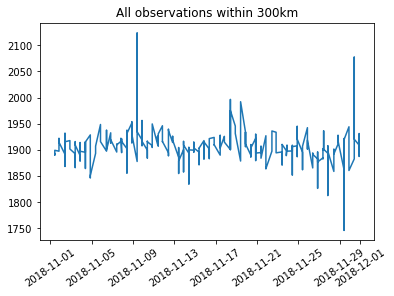

In [27]:

plt.plot(gases['datetime'], gases['CH4_MR_850mb'])
plt.title('All observations within 300km')
plt.xticks(rotation=35)
plt.show()

<div class="alert alert-block alert-info">
    
<b> Exercise 3: Creating a scatter plot </b>
    
  * Import time series data from VIIRSNDE_global2018312.v1.0.txt from Exercise 2. 
  * Use the ???.scatter(???, ???) to create a plot mapping the latitude/longitude location of fires.

</div>

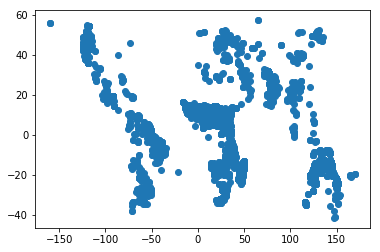

In [33]:
# Solution
#list(fires)
plt.scatter(fires['Lon'],fires['Lat'])
# OR
#plt.scatter(fires.Lon,fires.Lat)
plt.show()

<b> Computing basic statistics </b>

There are multiple observations per day in the gases plot - might be useful to only look at daily avergae.

* In pandas, the 'groupby' command passes the column name to perform an operation on.
* Chain another command telling it what operation to person (e.g. mean, standard deviation, or your own defined function)


In [36]:

dailyAvg = gases.groupby(gases.datetime.dt.day).mean()

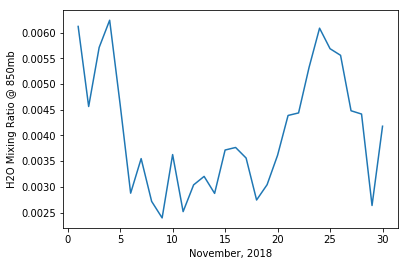

In [38]:
plt.plot(dailyAvg.index, dailyAvg['H2O_MR_850mb'])
#plt.scatter(dailyAvg.index, dailyAvg.H2O_MR_850mb)

plt.xlabel("November, 2018")
plt.ylabel("H2O Mixing Ratio @ 850mb")

plt.show()

<b> Adding data to an existing plot </b>
* Call plt.plot() and fill in the x and y variables for EACH line/data series on the plot
* Annotate and add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

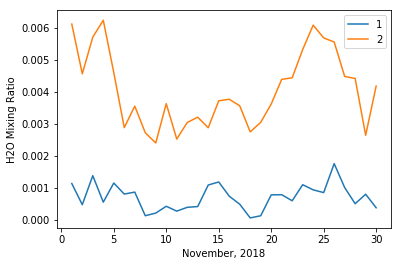

In [41]:
plt.plot(dailyAvg.index, dailyAvg['H2O_MR_500mb'])#, label="H20 500 mb")
plt.plot(dailyAvg.index, dailyAvg['H2O_MR_850mb'])#,label="H20 850 mb")

plt.xlabel("November, 2018")
plt.ylabel("H2O Mixing Ratio")

plt.legend() # Shows the legend
plt.show()

<b> Plotting ladder plots </b>

* Before writing your plt.plot code, add: plt.subplot( row number , column number , position of the plot )

* Call plt.plot() and fill in the x and y variables for the first line/data series on the plot

* Call plt.subplot again, increment the position of plot number
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

In this example:
* plt.subplot(2,2,1) places the plot in the first position of a two row, two column stack of plots.
* plt.subplot(1,2,2) places the plot in the second position of a two column, one row of plots next to each other.

For more details, refer https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html

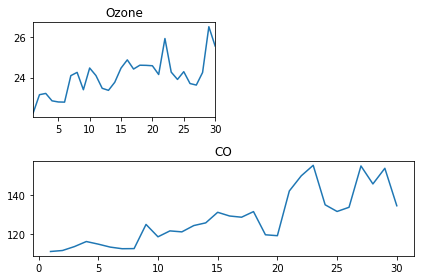

In [55]:
plt.subplot(2,2,1)
plt.plot(dailyAvg.index, dailyAvg.O3_MR_850mb)
plt.title('Ozone')
plt.xlim(1, 30)
#plt.legend()

plt.subplot(2,1,2)
plt.plot(dailyAvg.index, dailyAvg.CO_MR_850mb)
plt.title('CO')

plt.tight_layout() 
# automatically adjusts subplot params so that the subplot(s) fits
# in to the figure area.
plt.show()


<b> Plotting ladder plots by creating axis </b>

* Create different axis for different subplots using  plt.subplot( row number , column number , position of the plot )

* Call ax.plot() and fill in the x and y variables for the first line/data series on the plot

<b> Saving the plot</b>

* Use plt.savefig(fname, dpi=None) to save the figure at desired resolution.
* Make sure to save figure before plt.show()

In this example:
* We define a function that creates line plots and titles them for a given axis.
* We create different axis for the subplots and call the function.
* Save the figure in the folder Figures at 300 dpi and png format.

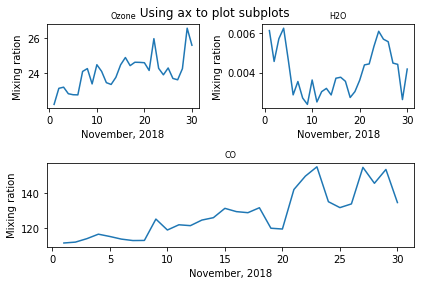

In [71]:
# Using a function to plot line plots subplots
def line_subplots(ax,X_column,Y_column, title):
    ax.plot(X_column, Y_column)
    ax.set_title(title, fontsize=8) # Specified the fontsize
    ax.set_xlabel("November, 2018")
    ax.set_ylabel("Mixing ration")
# Function ends

fig = plt.figure()

fig.suptitle(" Using ax to plot subplots")

# Creating axis
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 1, 2)


# Plotting subplots
line_subplots(ax1, dailyAvg.index, dailyAvg.O3_MR_850mb, 'Ozone')

line_subplots(ax2, dailyAvg.index, dailyAvg.H2O_MR_850mb, 'H2O') 

# PLotting third subplot
line_subplots(ax3, dailyAvg.index, dailyAvg.CO_MR_850mb, 'CO') 

plt.tight_layout()

# automatically adjusts subplot params so that the subplot(s) fits
# in to the figure area.
plt.savefig("Figures/mysubplot.png",dpi=300)
plt.show()

## Reading netcdf data and self-describing datasets

* Use netCDF4 package to read netcdf files
* The netCDF4 package is included in Anaconda Python. 
* The main function is Dataset, which reads from an existing file:

        file_id = Dataset("test.nc", "r", format="NETCDF4")

* You can choose to 'w' (write), 'r' (read), or 'a'
* The foramts can be: NETCDF3_CLASSIC, NETCDF3_64BIT_OFFSET, NETCDF3_64BIT_DATA, NETCDF4_CLASSIC, and NETCDF4 (default)


In this example, using MERRA2 Aerosol Optical Depth Analysis Data for, Nov 09, 2018, we learn how to
* Inspect the contents, dimenions variables and the metadata.
* Read the variables into arrays.

In [ ]:
# Import netCDF4. the syntax is case sensitive
from netCDF4 import Dataset

In [94]:
# To open the files, call the Dataset constructor
fname='Data/Mod_MERRA2_400.inst3_2d_gas_Nx.20181109.nc4.nc' 
file_id = Dataset(fname,'r') # 'r' stands for read mode



In [95]:
# Quickly inspect the contents
list(file_id.variables.keys())

['AODANA', 'lat', 'lon', 'time']

In [96]:
# Inspect the dimesnions
print (file_id.dimensions.keys())

for d in file_id.dimensions.items():
    print(d)

odict_keys(['time', 'lat', 'lon'])
('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 8
)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 361
)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 576
)


In [97]:
# Inspect attributes using .ncattrs command
list(file_id.variables['AODANA'].ncattrs())


['long_name',
 'units',
 '_FillValue',
 'missing_value',
 'fmissing_value',
 'scale_factor',
 'add_offset',
 'standard_name',
 'vmax',
 'vmin',
 'valid_range',
 'origname',
 'fullnamepath']

In [98]:
# Copy the AOD variable into an array object using .variables
# The data can be imported as a netcdf variable:
AOD = file_id.variables['AODANA']
print(type(AOD))


<class 'netCDF4._netCDF4.Variable'>


In [99]:
# Print the details of this variable
print(AOD)

<class 'netCDF4._netCDF4.Variable'>
float32 AODANA(time, lat, lon)
    long_name: Aerosol Optical Depth Analysis
    units: 1
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    scale_factor: 1.0
    add_offset: 0.0
    standard_name: Aerosol Optical Depth Analysis
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    origname: AODANA
    fullnamepath: /AODANA
unlimited dimensions: 
current shape = (8, 361, 576)
filling on


In [100]:
# Inspect the dimensions using .variables
print (file_id.variables['lat'])
print (file_id.variables['lon'])
print (file_id.variables['time'])


<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    CLASS: DIMENSION_SCALE
    NAME: lat
    long_name: latitude
    units: degrees_north
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    origname: lat
    fullnamepath: /lat
unlimited dimensions: 
current shape = (361,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    CLASS: DIMENSION_SCALE
    NAME: lon
    long_name: longitude
    units: degrees_east
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    origname: lon
    fullnamepath: /lon
unlimited dimensions: 
current shape = (576,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    CLASS: DIMENSION_SCALE
    NAME: time
    long_name: time
    units: minutes since 2018-11-09 00:00:00
    time_increment: 30000
    begin_date: 20181109
    begin_time: 0

In [101]:
# Get some very simple statistics by converting into a NumPy array
import numpy as np

AOD_arr = np.array(AOD)

# As this data doesn't have any missing values
# Let's explicitly set an array element to missing value

AOD_arr [0,0,0] = AOD._FillValue

avgAOD = AOD_arr.mean()
stdDev = AOD_arr.std()
nAOD = AOD_arr.size
print(avgAOD, stdDev, nAOD)

601146500.0 775335900000.0 1663488


In [102]:
# Remove missing values
missing = AOD._FillValue
keepRows = AOD_arr != missing
AOD_arr = AOD_arr[keepRows]
print (np.shape(AOD_arr))

avgAOD = AOD_arr.mean()
stdDev = AOD_arr.std()
nAOD = AOD_arr.size
print(avgAOD, stdDev, nAOD)

(1663487,)
0.102362625 0.08364344 1663487


In [103]:

# Note: importing using [:,:] turns the variable a numpy masked array
# Using masked arrays, missing values are automatically filtered
AOD = file_id.variables['AODANA'][:,:]
print(type(AOD))

<class 'numpy.ma.core.MaskedArray'>


In [104]:
# Using masked arrays, missing values are automatically filtered...
avgAOD = AOD.mean()
stdDev = AOD.std()
nAOD = AOD.size

print(avgAOD, stdDev, nAOD)

0.10236256 0.083643414 1663488


In [105]:

# Close the file when you're done
file_id.close()

## Resources

### Packages and Tutorials

<b> Pandas </b>
* Short Introduction: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* Cookbook for more details: https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook

---
<b> Matplotlib </b>
* Pyplot Tutorial: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

---
<b> Reading self describing file </b>
* <b> NETCDF </b>
    * Detailed tutorial https://unidata.github.io/netcdf4-python/netCDF4/index.html.
* <b> HDF files </b>
    * The package [h5py](https://www.h5py.org/) is similar to netcdf4.
    * User manual at http://docs.h5py.org/en/stable/.
* <b> GRIB/GRIB2 files </b>
    * World Meteorology Association standard format, e.g. commonly used with weather-related models like ECMWF and GFS.
    * Can be opened using [pygrib](https://github.com/jswhit/pygrib).
    * Example usage at https://jswhit.github.io/pygrib/docs/.
* <b> BUFR </b>
    * Another common model format.
    * Open with [python-bufr](https://github.com/pytroll/python-bufr), part of the pytroll project.
---    
    
### General Python resources    
<b> Free online Tutorials</b>
   * Youtube series for absolute beginners [CS Dojo](https://www.youtube.com/watch?v=Z1Yd7upQsXY&list=PLBZBJbE_rGRWeh5mIBhD-hhDwSEDxogDg)
   * Enhance your workflow [Automate Boring Stuff](https://automatetheboringstuff.com/)